In [1]:
from zipfile import ZipFile
file_name = "/content/arrests-data-march-2013-to-march-2019.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [3]:
# data manipulation libraries
import pandas as pd
import numpy as np

from time import time
# Graphs libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-white')
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly import tools

In [13]:
data = pd.read_csv('/content/arrests-data-march-2013-to-march-2019.csv', na_values=['Unknown', ' '])

In [14]:
data.shape

(109320, 16)

In [15]:
data.head().T

,0,1,2,3,4
Measure,Number of arrests,Number of arrests,Number of arrests,Number of arrests,Number of arrests
Time,2018/19,2018/19,2018/19,2018/19,2018/19
Time_type,Financial year,Financial year,Financial year,Financial year,Financial year
Ethnicity,All,All,All,Any other asian,Any other asian
Ethnicity_type,All,All,All,ONS 2001 16+1,ONS 2001 16+1
Gender,All,Female,Male,Female,Male
Gender_type,Male/Female,Male/Female,Male/Female,Male/Female,Male/Female
Age_Group,10 - 17 years,10 - 17 years,10 - 17 years,10 - 17 years,10 - 17 years
Age_Group_type,Arrest age group categories,Arrest age group categories,Arrest age group categories,Arrest age group categories,Arrest age group categories
Geography,All,All,All,All,All


In [16]:
data.columns

Index(['Measure', 'Time', 'Time_type', 'Ethnicity', 'Ethnicity_type', 'Gender',
       'Gender_type', 'Age_Group', 'Age_Group_type', 'Geography',
       'Geography_type', 'Number of arrests',
       'Population by ethnicity, gender, and PFA (based on 2011 Census)',
       'Rate per 1,000 population by ethnicity, gender, and PFA',
       'Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)',
       'Notes'],
      dtype='object')

In [17]:
data.isna().sum()

Measure                                                                                                                           0
Time                                                                                                                              0
Time_type                                                                                                                         0
Ethnicity                                                                                                                         0
Ethnicity_type                                                                                                                    0
Gender                                                                                                                            0
Gender_type                                                                                                                       0
Age_Group                                                                   

In [18]:
def print_missing_values(data):
    data_null = pd.DataFrame(len(data) - data.notnull().sum(), columns = ['Count'])
    data_null = data_null[data_null['Count'] > 0].sort_values(by='Count', ascending=False)
    data_null = data_null/len(data)*100

    trace = go.Bar(x=data_null.index, y=data_null['Count'], marker=dict(color='#c0392b'),
              name = 'At least one missing value', opacity=0.9)
    layout = go.Layout(barmode='group', title='Column with missing values in the dataset', showlegend=True,
                   legend=dict(orientation="h"), yaxis=dict(title='Percentage of the dataset'))
    fig = go.Figure([trace], layout=layout)
    py.iplot(fig)

In [ ]:
print('Number total of rows : '+str(data.shape[0]))
print_missing_values(data)

In [21]:
data.fillna(0, inplace=True)

In [22]:
data.isna().sum()

Measure                                                                                                                      0
Time                                                                                                                         0
Time_type                                                                                                                    0
Ethnicity                                                                                                                    0
Ethnicity_type                                                                                                               0
Gender                                                                                                                       0
Gender_type                                                                                                                  0
Age_Group                                                                                                      

In [34]:
def target_distribution(y_var, data):
    val = data[y_var]

    plt.style.use('seaborn-whitegrid')
    plt.rcParams.update({'font.size': 13})
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    cnt = val.value_counts().sort_values(ascending=True)
    labels = cnt.index.values

    sizes = cnt.values
    colors = sns.color_palette("rocket", len(labels))

    #------------COUNT-----------------------
    ax1.barh(cnt.index.values, cnt.values, color=colors)
    ax1.set_title('Count plot of '+y_var)

    #------------PERCENTAGE-------------------
    ax2.pie(sizes, labels=labels, colors=colors,autopct='%1.0f%%', shadow=True, startangle=130)
    ax2.axis('equal')
    ax2.set_title('Distribution of '+y_var)
    plt.show()

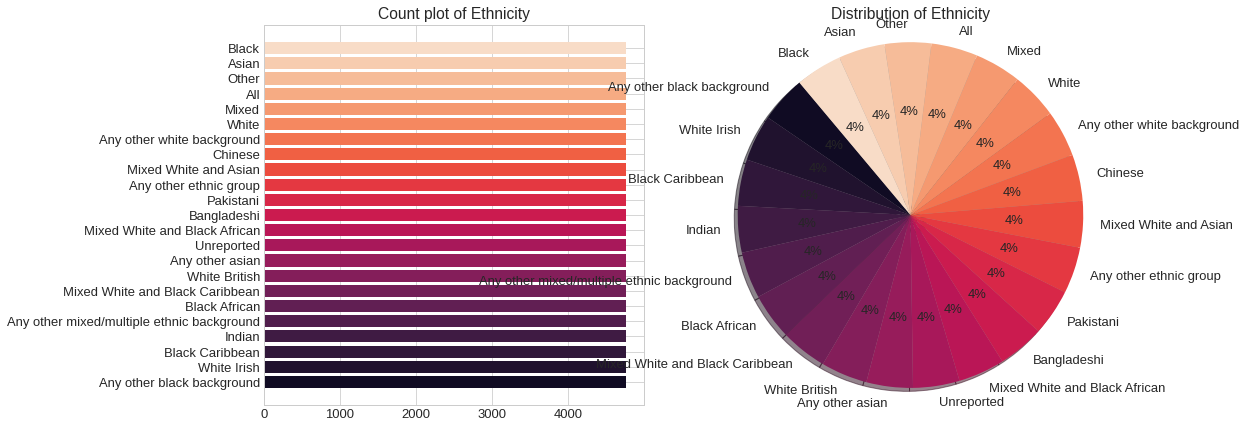

In [35]:
var = 'Ethnicity'
target_distribution(y_var=var, data=data)

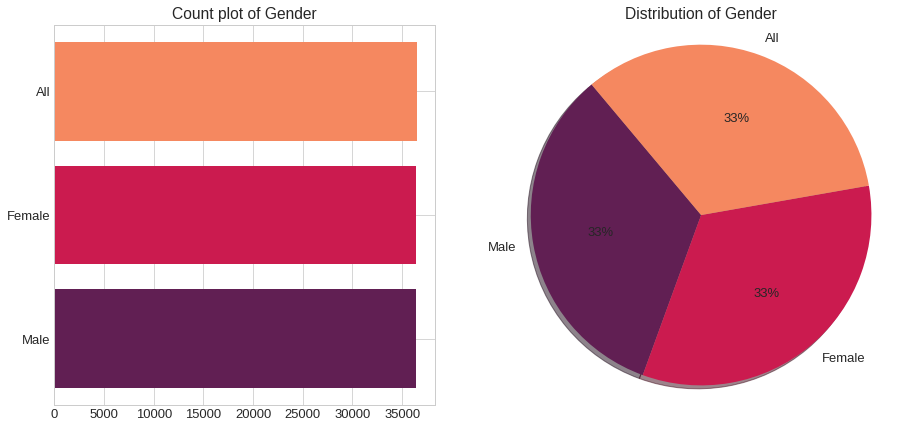

In [36]:
var = 'Gender'
target_distribution(y_var=var, data=data)

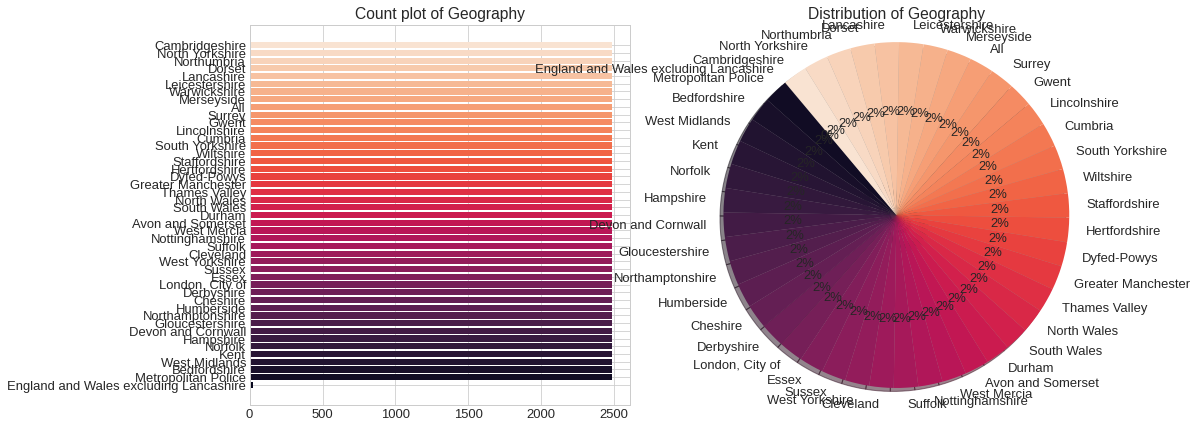

In [37]:
var = 'Geography'
target_distribution(y_var=var, data=data)

In [30]:
data['Frequency'] = 1
freq_target = data[['Ethnicity', 'Gender', 'Geography', 'Frequency']]
del data['Frequency']
freq_target = freq_target.groupby(by=['Ethnicity', 'Gender', 'Geography']).count() / len(data)
print(freq_target.sort_values(by='Frequency', ascending=False))

                                                                             Frequency
Ethnicity                     Gender Geography                                        
All                           All    All                                      0.000329
Mixed White and Black African Female Cambridgeshire                           0.000329
                              All    Thames Valley                            0.000329
                                     Warwickshire                             0.000329
                                     West Mercia                              0.000329
...                                                                                ...
Other                         All    England and Wales excluding Lancashire   0.000037
Asian                         All    England and Wales excluding Lancashire   0.000037
Mixed                         All    England and Wales excluding Lancashire   0.000037
White                         All    Englan

In [31]:
def plot_histo(data, col, Y_columns):
    df = data.copy()
    fig, axs = plt.subplots(1,2,figsize=(20,6))
    
    for i in range(0,2):
        cnt = []; y_col = Y_columns[i]
        Y_values = df[y_col].dropna().drop_duplicates().values
        for val in Y_values:
            cnt += [df[df[y_col] == val][col].values]
        bins = df[col].nunique()

        axs[i].hist(cnt, bins=bins, stacked=True)
        axs[i].legend(Y_values,loc='upper right')
        axs[i].set_title("Histogram of the "+col+" column by "+y_col)

    plt.show()